# Supervised Learning

## Linear Regression

* **Definition:** Learn a function h: X → Y where h(x) predicts y.
* **Hypothesis:** The function h(⋅).
* **Regression:** Predicting a continuous target variable (e.g., house price).
* **Classification:** Predicting a discrete target variable (e.g., house vs. apartment).

### Hypothesis Representation

* **Linear Function:**  $h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
    * $\theta_i$: Parameters/weights
    * $x_i$: Input features ($x_0 = 1$ for intercept term)
* **Vectorized Form:** $h(x) = \theta^Tx$  ($\theta$ and $x$ are vectors)
    * $n$: Number of input variables (excluding $x_0$)

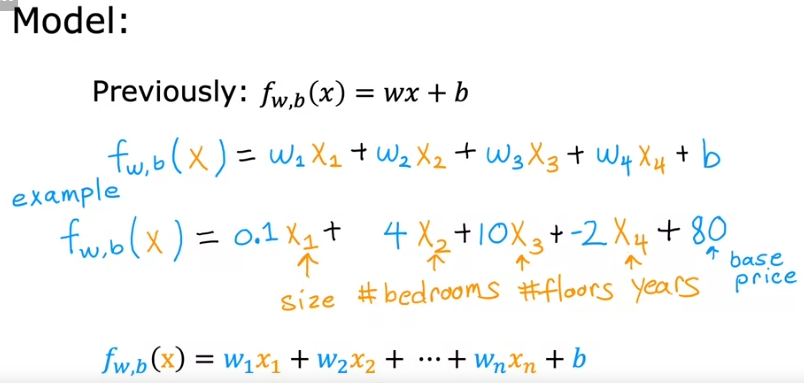

We can interpret this model like this:
- The model increases by 0.1 times for each unit of size.
- The model increases by 4 times for each unit of bedroom.
- The model decreases by 2 times for each year.
  
The base price of the real estate is 80 (when all of the variables are 0).

## Cost Function

Measures the error between predicted and actual values (e.g., Mean Squared Error).

* **Least Squares:** $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$
    * Measures how close predictions are to actual values.
    * $m$: Number of training examples

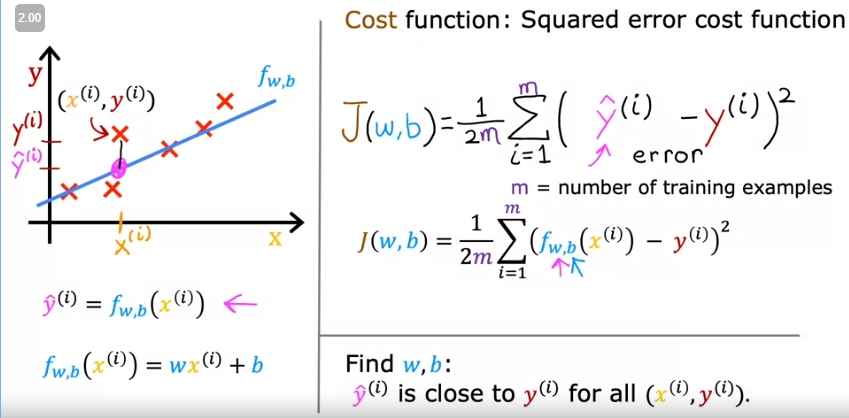
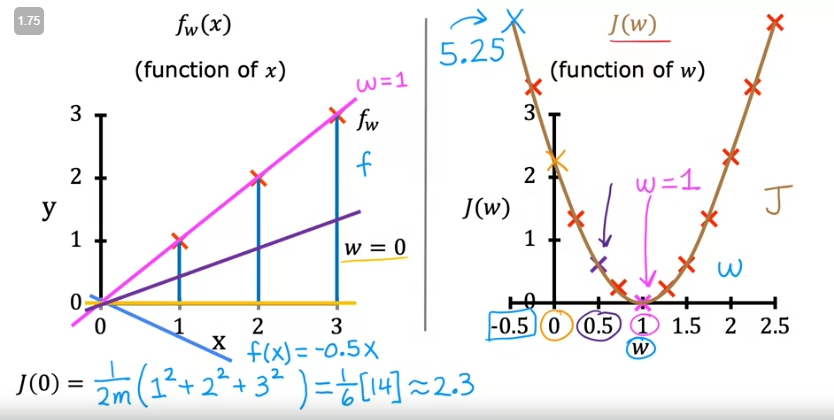

## Gradient Descent

Iterative algorithm to minimize the cost function and find optimal $\theta$ values.

* **Goal:** Minimize $J(\theta)$ by iteratively updating $\theta$.
* **General Update Rule:** $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$
    * $\alpha$: Learning rate
* **Partial Derivative:** $\frac{\partial}{\partial \theta_j}J(\theta) = \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$
* **LMS Update Rule (Single Training Example):** $\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$
    * Also known as Widrow-Hoff learning rule.
    * Update proportional to the error.

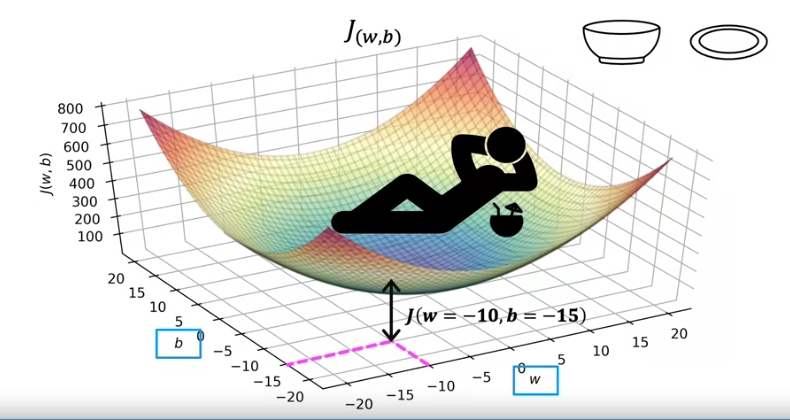

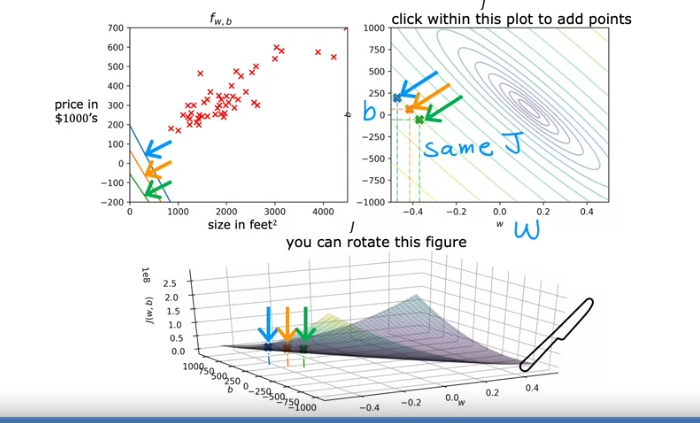

## Gradient Descent Variants

* **Batch Gradient Descent:**
    * Updates $\theta$ after looking at all training examples.
    * $\theta_j := \theta_j + \alpha \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$ (for all $j$)
    * Converges to global minimum for linear regression (convex quadratic function).
* **Stochastic Gradient Descent:**
    * Updates $\theta$ after each training example.
    * $\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$ (for all $j$, for each $i$)
    * Faster for large datasets, but may oscillate around the minimum.
    * Can converge to minimum with decreasing learning rate $\alpha$.

### Question
In machine learning, which optimization algorithm is typically used for non-convex optimization problems?  

> Stochastic Gradient Descent is typically used for non-convex optimization problems, as it is able to escape local minima by introducing randomness into the optimization process.

## Linear Regression Assumptions

1. **Linearity**: The relationship between the independent variables (predictors) and the dependent variable is linear.

2. **Independence**: Observations are independent of each other, meaning the errors (residuals) are not correlated across observations.

3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variables.

4. **Normality of Residuals**: The residuals (differences between observed and predicted values) should be normally distributed.

5. **No Multicollinearity**: Independent variables are not highly correlated with each other.

6. **No Autocorrelation**: There is no correlation between the residuals over time (important for time series data).


# Polynomial Regression Cheatsheet

## 1. Introduction

* **Motivation:** Extending linear regression to model non-linear relationships between variables.
* **Core Idea:** Transforming the original features into polynomial features and then applying linear regression.

## 2. Polynomial Feature Engineering

* **Transforming Features:** Creating new features by raising existing features to various powers.
    * Example:  If $x$ is a feature, polynomial features could be $x^2$, $x^3$, etc.
* **General Form:**  A polynomial regression model of degree *n* can be represented as:

    $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon$

    where:
        * $y$ is the target variable
        * $x$ is the original feature
        * $\beta_0, \beta_1, ..., \beta_n$ are the coefficients to be learned
        * $\epsilon$ is the error term
* **Example:**  For a 2nd degree polynomial (quadratic) with two original features ($x_1$ and $x_2$), the transformed features would include $x_1$, $x_2$, $x_1^2$, $x_2^2$, and potentially the interaction term $x_1x_2$.

## 3. Advantages and Disadvantages

* **Advantages:**
    * Can model non-linear relationships.
    * Relatively simple to implement and understand.
* **Disadvantages:**
    * Can overfit if the polynomial degree is too high. Careful selection of the degree and regularization techniques are important.
    * Outliers can have a significant impact on the model.
    * Can be computationally expensive for very high-degree polynomials.


# Logistic Regression

## The Classification Problem

* **Introduction:**  Deals with predicting discrete values of $y$, unlike regression which predicts continuous values.
* **Binary Classification:** Focuses on $y \in \{0, 1\}$, where 0 represents the negative class and 1 represents the positive class.
* **Label:**  $y^{(i)}$ corresponding to $x^{(i)}$ is called the label of the training example.


## Motivation

* **Linear Regression Shortcomings:** Applying linear regression directly to classification by thresholding the output at 0.5 can lead to poor performance, especially with outliers heavily influencing the decision boundary.
* **Intuitive Issue:** Linear regression's output can be $\ll 0$ and $\gg 1$, which doesn't align with the binary nature of $y \in \{0, 1\}$.


## Logistic Regression

* **Hypothesis:**  Defined as $h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$, where $g(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid or logistic function.
* **Sigmoid Function:** Maps any input $z \in [-\infty, \infty]$ to an output in the range $[0, 1]$, suitable for probability interpretation.
    * Properties:
        * $g(z) \to 1$ as $z \to \infty$
        * $g(z) \to 0$ as $z \to -\infty$
        * $g(0) = 0.5$
        * Derivative: $g'(z) = g(z)(1 - g(z))$
      

## Cost Function

### Introduction

Logistic regression uses a sigmoid function to predict the probability of a binary outcome.  The cost function measures the error between the predicted probability and the actual outcome.  It guides the learning process by quantifying how well the model's parameters fit the training data.  The goal of training is to find the parameters that minimize this cost function.

### Binary Cross-Entropy Loss

The standard cost function for logistic regression is the binary cross-entropy loss (also known as log loss).  It is defined for a single training example as:

$J(\theta) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]$

Where:

* $y$ is the true label (0 or 1)
* $\hat{y}$ is the predicted probability, given by the sigmoid function: $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$, where $z = \theta^T x$  ($\theta$ are the model parameters and $x$ is the feature vector)


### Cost Function for Multiple Training Examples

For $m$ training examples, the average cost function is:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$

### Intuition Behind the Cost Function

* **Case 1: y = 1 (Positive Example):**  If the true label is 1, the cost function simplifies to $- \log(\hat{y})$.  If the prediction $\hat{y}$ is close to 1 (correct prediction), the cost is close to 0.  However, if $\hat{y}$ is close to 0 (incorrect prediction), the cost approaches infinity.

* **Case 2: y = 0 (Negative Example):** If the true label is 0, the cost function simplifies to $- \log(1 - \hat{y})$. If the prediction $\hat{y}$ is close to 0 (correct prediction), the cost is close to 0.  However, if $\hat{y}$ is close to 1 (incorrect prediction), the cost approaches infinity.


### Why Cross-Entropy and Not Squared Error?

While squared error could be used, cross-entropy is preferred for logistic regression for several reasons:

* **Convexity:** The cross-entropy loss function is convex for logistic regression, which guarantees finding the global minimum during optimization. Squared error with a sigmoid activation can lead to a non-convex function with local minima.

* **Faster Convergence:** Cross-entropy typically leads to faster convergence during gradient descent optimization.

* **Probabilistic Interpretation:** Cross-entropy has a natural probabilistic interpretation related to maximizing the likelihood of the observed data.



## Optimization

### Gradient Descent

Gradient descent is commonly used to minimize the cost function and find the optimal parameters $\theta$. The update rule for each parameter $\theta_j$ is:

$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$

Where:

* $\alpha$ is the learning rate, controlling the step size during updates.
* $\frac{\partial J(\theta)}{\partial \theta_j}$ is the partial derivative of the cost function with respect to $\theta_j$.


### Derivative of the Cost Function

The partial derivative of the cost function with respect to $\theta_j$ is:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})x_j^{(i)}$


### Update Rule

* **Probabilistic Interpretation:**
    * $P(y^{(i)} = 1 | x^{(i)}; \theta) = h_\theta(x^{(i)})$
    * $P(y^{(i)} = 0 | x^{(i)}; \theta) = 1 - h_\theta(x^{(i)})$
    * Compactly: $P(y^{(i)} | x^{(i)}; \theta) = (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}$
* **Likelihood Function:** Assuming independent training examples, the likelihood of the parameters $\theta$ is $L(\theta) = P(\vec{y} | X; \theta) = \prod_{i=1}^{m} P(y^{(i)} | x^{(i)}; \theta) = \prod_{i=1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}$
* **Log-Likelihood:** $\ell(\theta) = \log L(\theta) = \sum_{i=1}^{m} y^{(i)} \log h(x^{(i)}) + (1 - y^{(i)}) \log(1 - h(x^{(i)}))$
* **Gradient Ascent:** Used to maximize $\ell(\theta)$.
    * Update Rule (Batch Gradient Ascent):  $\theta_j := \theta_j + \alpha \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$
    * Update Rule (Stochastic Gradient Ascent): $\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$
    * $\alpha$ is the learning rate.
* **Comparison with Linear Regression:**  The update rule looks identical to Least Mean Squares (LMS), but $h_\theta(x^{(i)})$ is now a non-linear function.  This similarity arises because both are specific instances of Generalized Linear Models.


# Comparative table Linear Regression and Logist Regression

| Outcome        | Linear Regression | Logistic Regression |
|----------------|-------------------|--------------------|
|                | Continuous value   | Classification     |
| Model         | $f_{w,b}(x) = wx + b$ | $g(z) = \frac{1}{1 + e^{-z}}$ <br> $f_{w,b}(x) = g(wx + b)$ |
| Loss          | $f_{w,b}(x^{(i)}) - y^{(i)}$ | $loss(f_{w,b}(x^{(i)}), y^{(i)}) = -y^{(i)} \log(f_{w,b}(x^{(i)})) - (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)}))$ |
| Loss Graph    | 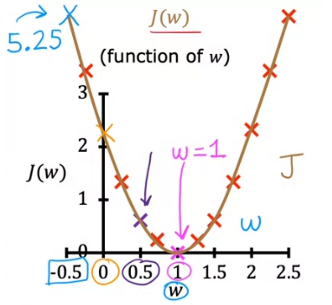 | 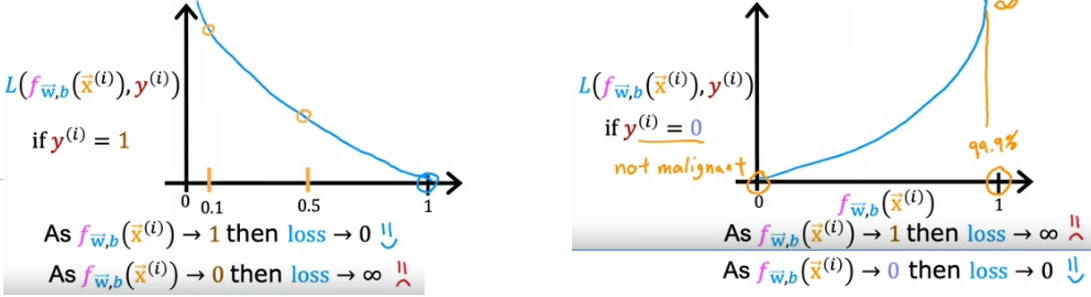 |
| Cost          | $J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$ | $J(w,b) = \frac{1}{m} \sum_{i=0}^{m-1} [loss(f_{w,b}(x^{(i)}), y^{(i)})]$ |
| Cost Implementation | `f_wb = np.dot(x,w) + b` <br> `total_cost = (1/(2*m)) * np.sum((f_wb - y)**2)` | `f_wb = sigmoid(np.dot(X, w) + b)` <br> `total_cost = np.sum(-y*np.log(f_wb) - (1 - y)*np.log(1 - f_wb)) / m` |
| Gradient vector | $\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)}$ <br> $\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})$ | $\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)}$ <br> $\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})$ |
| Gradient vector implementation <br> Batch Gradient Descent | `for i in range(n): #for each feature` <br> `dj_dw[i] = (1/m) * np.sum((f_wb - y) * X[:,i])` <br> `for i in range(num_iters):` <br> `dj_dw, dj_db = gradient_function(x, y, w, b)` <br> `w = w - alpha * dj_dw` <br> `b = b - alpha * dj_db` | `for i in range(n): #for each feature` <br> `dj_dw[i] = (1/m) * np.sum((f_wb - y) * X[:,i])` <br> `for i in range(num_iters):` <br> `dj_dw, dj_db = gradient_function(x, y, w, b)` <br> `w = w - alpha * dj_dw` <br> `b = b - alpha * dj_db` |



# Feature scaling

## When to Use?
-   Almost always beneficial for gradient descent-based algorithms.
-   Doesn't negatively impact model performance.
-   Especially important with polynomial features and distance-based algorithms (e.g., KNN, SVM).

## What Rescaling Does

-   Transforms features to a similar scale.
-   Prevents features with larger values from dominating the learning process.
-   Speeds up gradient descent convergence.


## Types of Rescaling

### 1. Min-Max Scaling

-   **How to calculate:**
    $x_{scaled} = \frac{x}{x_{max}}$
-   **Range:** 0 to 1
-   **Effect:** Scales features to a fixed range, preserving the original distribution shape. Sensitive to outliers in the maximum value.

### 2. Mean Normalization

-   **How to calculate:**
    $x_{scaled} = \frac{x - \mu}{x_{max} - x_{min}}$
    where $\mu$ is the mean of the feature.
-   **Range:** Approximately -1 to 1.  The exact range depends on the data distribution.
-   **Effect:** Centers the data around zero and scales it.  Less sensitive to outliers in the maximum value than Min-Max Scaling but still slightly influenced.

### 3. Z-Score Standardization (Standard Scaling)

-   **Related to:** Normal Distribution
-   **How to calculate:**
    $x_{scaled} = \frac{x - \mu}{\sigma}$
    where $\mu$ is the mean and $\sigma$ is the standard deviation of the feature.
-   **Range:**  Negative to positive, centered around 0. Most values within -3 to 3.
-   **Effect:** Transforms data to have a mean of 0 and a standard deviation of 1.  Not affected by outliers as it uses standard deviation for scaling.  Assumes data is approximately normally distributed or that this distribution is beneficial.  This is often the preferred method for many machine learning algorithms.

**Importance of Feature Scaling with Polynomial Features**

-   Polynomial features can create vastly different scales between features, making feature scaling crucial for stable and efficient model training.

**Additional Notes**

* **Choosing the right method:** Z-score standardization is often a good default choice.  However, if you need values within a specific range (like 0-1 for neural network activations), min-max scaling is appropriate. For image data, simple normalization (dividing by 255) is common.
* **Scaling training and testing data:**  Crucially, the same scaling parameters (mean, standard deviation, min, max) learned from the *training* data must be applied to the *testing* data.  Never scale training and testing data independently.


# Decision Boundary

## Linear Decision Boundaries

### One Variable

*   A linear decision boundary in one dimension is a single point.  It separates the input space into two regions based on a threshold.  
*   Example:  If $x > 3$, classify as Class A; otherwise, classify as Class B. The decision boundary is at $x = 3$.

### Two Variables

*   A linear decision boundary in two dimensions is a straight line. It's defined by an equation of the form $ax + by + c = 0$.
*   Example: $2x + 3y - 6 = 0$ defines a line. Points on one side of the line belong to one class, and points on the other side belong to another class.  The line itself represents the decision boundary.
*   This concept extends to higher dimensions, where the decision boundary becomes a hyperplane.  For example, in three dimensions, the linear decision boundary is a plane.

## Non-Linear Decision Boundaries

### One or More Variables

*   Non-linear decision boundaries can take any shape needed to separate classes. Common examples include curves, circles, ellipses, or more complex shapes.
*   They are often necessary when the classes cannot be separated linearly.
*   Example:  A circular decision boundary might be defined by an equation like $(x-a)^2 + (y-b)^2 = r^2$. Points inside the circle would belong to one class, and points outside to another.
*   Models that can create non-linear decision boundaries include:
    *   **Polynomial Regression:**  Extends linear regression by adding polynomial terms (e.g., $x^2$, $x^3$) to the equation, creating curved lines.
    *   **Support Vector Machines (SVMs) with Kernels:** Use kernel functions to map data points to a higher-dimensional space where a linear separation might be possible. The decision boundary in the original space becomes non-linear.
    *   **Decision Trees:**  Partition the input space into rectangular regions, creating piecewise linear decision boundaries.  Combining many trees (e.g., Random Forests) can lead to more complex, non-linear boundaries.
    *   **Neural Networks:**  Can create highly complex decision boundaries due to their layered structure and non-linear activation functions.


## Visualizing Decision Boundaries

Visualizing decision boundaries helps understand how a model classifies data.  Libraries like Matplotlib (in Python) can be used to plot the decision boundary along with the data points.  This allows for a visual inspection of the model's performance and potential areas of misclassification.


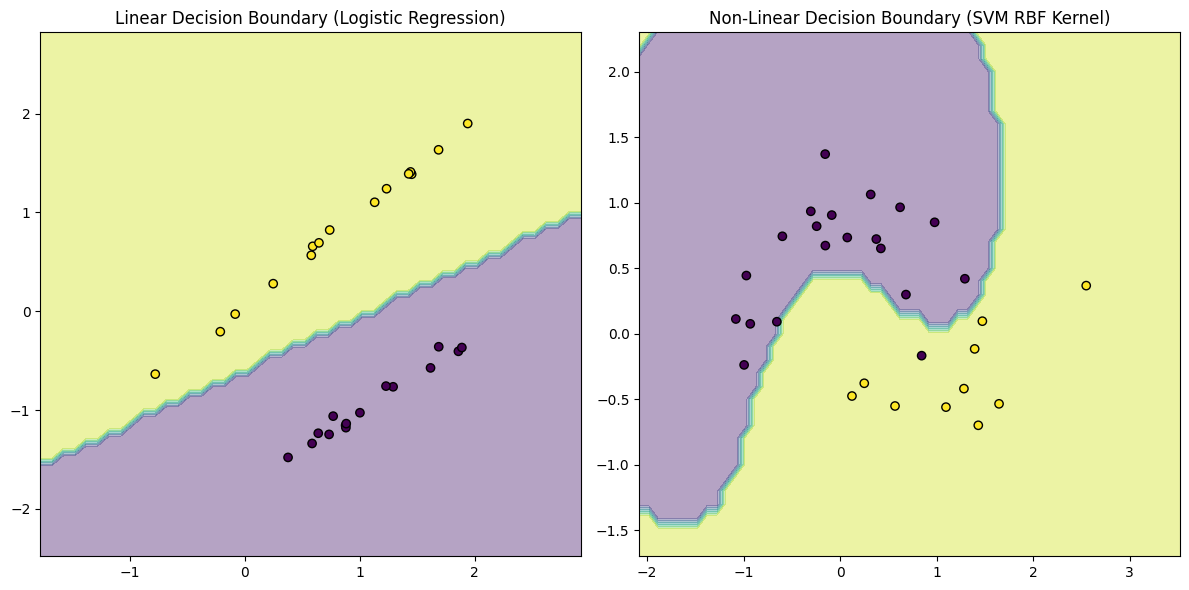

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

# Generate linear and non-linear data
X_linear, y_linear = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X_non_linear, y_non_linear = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)

# Linear model (Logistic Regression)
linear_model = LogisticRegression()
linear_model.fit(X_train_lin, y_train_lin)

# Non-linear model (SVM with RBF kernel)
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train_nl, y_train_nl)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Linear Decision Boundary
plot_decision_boundary(linear_model, X_test_lin, y_test_lin, ax[0], 'Linear Decision Boundary (Logistic Regression)')

# Plot Non-Linear Decision Boundary
plot_decision_boundary(non_linear_model, X_test_nl, y_test_nl, ax[1], 'Non-Linear Decision Boundary (SVM RBF Kernel)')

plt.tight_layout()
plt.show()


# Bias (Underfit) and Variance (Overfit)

## What is Bias?
- Error between average model prediction and ground truth.
- The bias of the estimated function tells us the capacity of the underlying model to predict the values.
$$
\text{Bias} = \mathbb{E}[\hat{f}(x)] - f(x)
$$

## What is Variance?
- Average variability in the model prediction for the given dataset.
- The variance of the estimated function tells you how much the function can adjust to the change in the dataset.
$$
\text{Variance} = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]
$$

## High Bias vs. High Variance

### High Bias
- Overly-simplified Model.
- Underfitting.
- High error on both test and train data.

### High Variance
- Overly-complex Model.
- Overfitting.
- Low error on train data and high on test.
- Starts modeling the noise in the input.

## Bias-Variance Trade-off
- Increasing bias (not always) reduces variance and vice-versa.
- Error = bias² + variance + irreducible error.
- The best model is where the error is reduced.
- Compromise between bias and variance.

$$
\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$


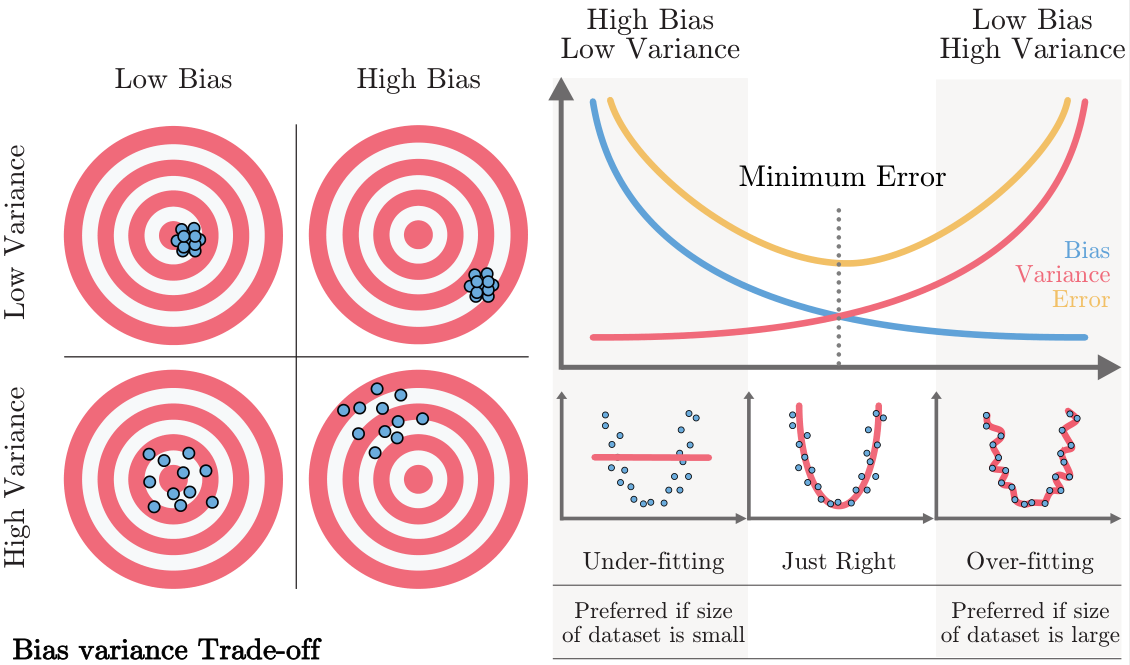


### Ways to Deal with Overfitting

1. **Train with More Data**
   - Increase the size of the training dataset to provide more examples for the model.

2. **Data Augmentation**
   - Create variations of the training data (e.g., rotations, shifts, scaling) to enhance the dataset without collecting new data.

3. **Regularization Techniques**
   - **L1 Regularization (Lasso):** Adds a penalty equal to the absolute value of the magnitude of coefficients.
   - **L2 Regularization (Ridge):** Adds a penalty equal to the square of the magnitude of coefficients.

4. **Early Stopping**
   - Monitor the model’s performance on a validation set and stop training when performance starts to degrade.

5. **Simplifying the Model**
   - Use a less complex model with fewer parameters to reduce the risk of overfitting.

6. **Cross-Validation**
   - Use k-fold cross-validation to ensure the model performs well on different subsets of the data.

7. **Dropout (for Neural Networks)**
   - Randomly set a fraction of input units to zero during training to prevent co-adaptation of neurons.

8. **Ensemble Methods**
   - Combine multiple models (e.g., bagging, boosting) to improve generalization.

9. **Feature Selection**
   - Remove irrelevant or redundant features to reduce complexity and improve model performance.


# Regularization in Machine Learning

## What is Regularization?

* Regularization is a technique to combat overfitting in machine learning.
* Overfitting occurs when a model performs well on training data but poorly on unseen test data, failing to generalize.
* It's common when the model has high variance/low bias or when training data is limited.
* Regularization aims to reduce the model's variance.

## Types of Regularization

### Modifying the Loss Function

* **L2 Regularization (Ridge Regression):**
    * Penalizes large weights using the L2 norm (sum of squared weights).
    * $Loss = Original Loss + \lambda \sum_{i=1}^{n} w_i^2$  where $\lambda$ is the regularization strength.
    * Shrinks weights towards zero but doesn't perform feature selection.

* **L1 Regularization (Lasso Regression):**
    * Penalizes large weights using the L1 norm (sum of absolute weights).
    * $Loss = Original Loss + \lambda \sum_{i=1}^{n} |w_i|$ where $\lambda$ is the regularization strength.
    * Induces sparsity by forcing some weights to exactly zero, effectively performing feature selection.

* **Entropy Regularization (e.g., Cross-Entropy):**
    * Primarily used for models predicting probabilities.
    * Encourages the predicted probability distribution to be closer to uniform, preventing overconfidence.
    * Example in binary classification: $Loss = - \sum_{i=1}^{n} [y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)]$

### Changing Training Approach

* **Injecting Noise:**
    * Adds random noise to the weights during training.
    * Makes the model more robust to small variations in the input and weights.

* **Dropout:**
    * Primarily used in neural networks.
    * Randomly drops out neurons (along with their connections) during each training iteration.
    * Prevents complex co-adaptations between neurons, encouraging them to learn more independent features.
    * Improves generalization and reduces overfitting.
